<a href="https://colab.research.google.com/github/zarrinan/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module2-polynomial-regression/U2_S2_D2_Polynomial_Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
##### Your Code Here #####

In [0]:
!pip install seaborn==0.9.0 -q

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [0]:
sns.__version__

In [0]:
raw = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv', index_col=0)
print(raw.shape)
raw.head()

In [0]:
raw.columns

In [0]:
raw.dtypes

In [0]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummy_encode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [0]:
df = dummy_encode(raw)
df.head()

In [0]:
df['Alley'].replace(np.nan, 'No', inplace=True)

In [0]:
df['MasVnrType'].replace('None', 'No', inplace=True)
df['MasVnrType']


In [0]:
df['BsmtQual'].replace('NA', 'No', inplace=True)
df['BsmtQual']

In [0]:
df['BsmtQual'].replace(np.nan, 'No', inplace=True)

In [0]:
df['BsmtCond'].replace('NA', 'No', inplace=True)
df['BsmtCond'].replace(np.nan, 'No', inplace=True)

In [0]:

df['BsmtFinType1'].replace('NA', 'No', inplace=True)
df['BsmtFinType1'].replace(np.nan, 'No', inplace=True)

In [0]:
df['BsmtFinType1'].replace('NA', 'No', inplace=True)
df['BsmtFinType1'].replace(np.nan, 'No', inplace=True)

In [0]:
df['BsmtFinType2'].replace('NA', 'No', inplace=True)
df['BsmtFinType2'].replace(np.nan, 'No', inplace=True)

In [0]:
df['GarageQual'].replace('NA', 'No', inplace=True)
df['GarageQual'].replace(np.nan, 'No', inplace=True)

In [0]:
df['GarageCond'].replace('NA', 'No', inplace=True)
df['GarageCond'].replace(np.nan, 'No', inplace=True)

In [0]:
df_en = dummy_encode(raw)
df_en.head()

In [320]:
en = df_en.drop(['BsmtExposure', 'Electrical', 'FireplaceQu', 'GarageType','GarageFinish', 'PoolQC', 'Fence', 'MiscFeature' ], axis=1)
en.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


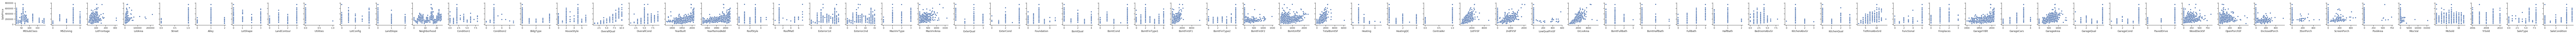

In [45]:
sns.set(style='ticks', color_codes=True)
x_columns = en.columns.drop('SalePrice')
sns.pairplot(data=en, y_vars=['SalePrice'], x_vars=x_columns);

#### log transformation of y variable

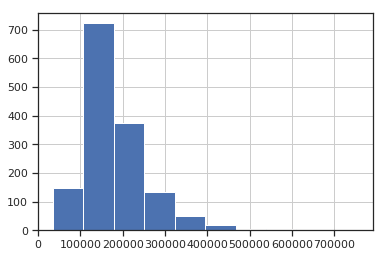

In [49]:
en['SalePrice'].hist()

In [0]:
en['ln_price'] = np.log(en['SalePrice'])

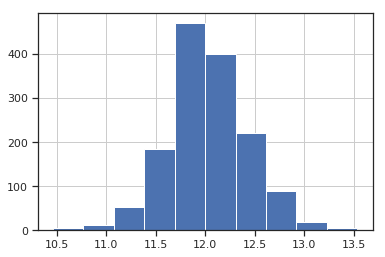

In [52]:
en['ln_price'].hist()

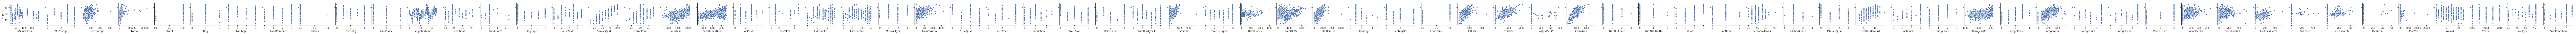

In [53]:
sns.set(style='ticks', color_codes=True)
x_columns = en.columns.drop(['SalePrice', 'ln_price'])
sns.pairplot(data=en, y_vars=['ln_price'], x_vars=x_columns);

From the graph above, overall quality, year built, total basement square footage, 1st floor square footage, 2nd floor square footage, neighborhood, above grade (ground) living area square feet, total rooms above ground, garage area seem to have the most correlation with the sales price

In [0]:
en = en.dropna().copy()

In [0]:
names = ['Neighborhood','BldgType', 'HouseStyle','LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','FullBath', 'HalfBath', 'BedroomAbvGr', 
       'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'GarageQual',  'GarageCond', 'PavedDrive','WoodDeckSF',
       'EnclosedPorch','ScreenPorch', 'ln_price']

In [0]:
col_names = ['BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl','BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating','HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','FullBath', 'HalfBath', 'BedroomAbvGr', 
       'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars',
       'GarageArea', 'GarageQual',  'GarageCond', 'PavedDrive','WoodDeckSF',
       'EnclosedPorch','ScreenPorch']

In [325]:
en = en[names]
en.head()

,Neighborhood,BldgType,HouseStyle,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,EnclosedPorch,ScreenPorch,ln_price
Id,,,,,,,,,,,,,,,,,,,,,
1,5,0,5,8450,7,5,2003,2003,1,1,...,0,2,548,5,5,2,0,0,0,12.247694
2,24,0,2,9600,6,8,1976,1976,1,1,...,1,2,460,5,5,2,298,0,0,12.109011
3,5,0,5,11250,7,5,2001,2002,1,1,...,1,2,608,5,5,2,0,0,0,12.317167
4,6,0,5,9550,7,5,1915,1970,1,1,...,1,3,642,5,5,2,0,272,0,11.849398
5,15,0,5,14260,8,5,2000,2000,1,1,...,1,3,836,5,5,2,192,0,0,12.429216


In [0]:
def print_rse_r2(df, target, cols):
  y = en_n.loc[:, [target]].values
  new_cols = []
  results = []
  for col in cols:
    new_cols.append(col)
    #print(new_cols)
    X = en_n.loc[:, new_cols].values
    # Slit into test and train datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=42)

    # fit model using train datasets
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Create new predictions using x_test
    y_pred = model.predict(X_test)

    # Measure Accuracy using y_test and y_pred
    RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
    R2 = r2_score(Y_test, y_pred)
    
    results.append((len(new_cols), RMSE, R2))
  return results


In [0]:
print_rse_r2(en, 'ln_price', col_names)

#### polynomial features

In [0]:
en['squared_garage_cars'] = en['GarageCars']**2
en['squared_overall_qual'] = en['OverallQual'] **2

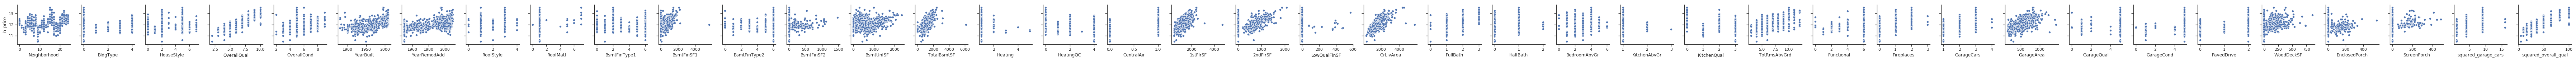

In [298]:
sns.set(style='ticks', color_codes=True)
x_columns = en.columns.drop(['ln_price'])
sns.pairplot(data=en, y_vars=['ln_price'], x_vars=x_columns);

In [0]:
p_names = col_names + ['squared_garage_cars', 'squared_overall_qual']

In [0]:
p_names

In [317]:
y = en.loc[:, ['ln_price']].values
X = en.loc[:, p_names].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.15503486075148265
R^2 is 0.8582254785886047
coefficients:  [-2.15166097e-02 -2.88946394e-03  8.15369428e-02  3.45557148e-02
  2.30345804e-03  8.09519813e-04  1.69069404e-02  3.77937175e-02
 -1.28557427e-02  1.30418576e+08  8.64031842e-03  1.30418576e+08
  1.30418576e+08 -1.30418576e+08  2.50147657e-02 -8.70952622e-03
  9.22562101e-02  1.26084379e+09  1.26084379e+09  1.26084379e+09
 -1.26084379e+09  6.66076758e-02  2.06232600e-02 -8.72559532e-03
 -9.45726720e-02 -3.19457970e-02  1.70195822e-02  1.91453195e-02
  4.47053018e-02 -5.84334758e-02  1.32170958e-06 -2.63088950e-03
  6.38739857e-03  1.35857944e-02  8.91587643e-05  2.22698671e-04
  2.45578843e-04  3.70980339e-02 -7.53109653e-04]
intercepts:  [4.53247832]


From the results above, squared features are not effective in reducing the RMSE

In [0]:
en = en.drop(columns=['squared_garage_cars', 'squared_overall_qual'], axis=1).copy()
en.head()

In [328]:
en.head()

,Neighborhood,BldgType,HouseStyle,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,Fireplaces,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,EnclosedPorch,ScreenPorch,ln_price
Id,,,,,,,,,,,,,,,,,,,,,
1,5,0,5,8450,7,5,2003,2003,1,1,...,0,2,548,5,5,2,0,0,0,12.247694
2,24,0,2,9600,6,8,1976,1976,1,1,...,1,2,460,5,5,2,298,0,0,12.109011
3,5,0,5,11250,7,5,2001,2002,1,1,...,1,2,608,5,5,2,0,0,0,12.317167
4,6,0,5,9550,7,5,1915,1970,1,1,...,1,3,642,5,5,2,0,272,0,11.849398
5,15,0,5,14260,8,5,2000,2000,1,1,...,1,3,836,5,5,2,192,0,0,12.429216


In [327]:
en.columns

Index(['Neighborhood', 'BldgType', 'HouseStyle', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'EnclosedPorch',
       'ScreenPorch', 'ln_price'],
      dtype='object')

In [0]:
en['area_bsmt'] = en['LotArea']/en['TotalBsmtSF']
en['area_lv'] = en['LotArea']/en['GrLivArea']
en['area_rooms'] = en['LotArea']/en['TotRmsAbvGrd']
en['area_garage'] = en['LotArea']/en['GarageArea']
en['revovated'] = 2019 - (en['YearRemodAdd'] - en['YearBuilt'])




In [330]:
en.head()

,Neighborhood,BldgType,HouseStyle,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,...,PavedDrive,WoodDeckSF,EnclosedPorch,ScreenPorch,ln_price,area_bsmt,area_lv,area_rooms,area_garage,revovated
Id,,,,,,,,,,,,,,,,,,,,,
1,5,0,5,8450,7,5,2003,2003,1,1,...,2,0,0,0,12.247694,9.871495,4.941520,1056.250000,15.419708,2019
2,24,0,2,9600,6,8,1976,1976,1,1,...,2,298,0,0,12.109011,7.606973,7.606973,1600.000000,20.869565,2019
3,5,0,5,11250,7,5,2001,2002,1,1,...,2,0,0,0,12.317167,12.228261,6.298992,1875.000000,18.503289,2018
4,6,0,5,9550,7,5,1915,1970,1,1,...,2,0,272,0,11.849398,12.632275,5.562027,1364.285714,14.875389,1964
5,15,0,5,14260,8,5,2000,2000,1,1,...,2,192,0,0,12.429216,12.454148,6.487716,1584.444444,17.057416,2019


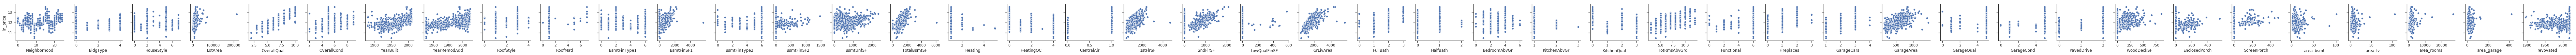

In [331]:
sns.set(style='ticks', color_codes=True)
x_columns = en.columns.drop(['ln_price'])
sns.pairplot(data=en, y_vars=['ln_price'], x_vars=x_columns);

In [0]:
eng_list = ['area_bsmt', 'area_lv', 'area_rooms', 'area_garage', 'renovated']

In [0]:
y = en.loc[:, ['ln_price']].values
X = en.loc[:, eng_list].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data